機械学習の実施と、結果の解釈のためSHAPを活用した可視化例を載せています。
実務ではコンバージョン有無などでモデル化することが多いため、ダミーのデータセットは二値分類データのadult(どのような特徴を持つ人が高年収か)を利用しています。

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score

import shap
shap.initjs() # 可視化に必要

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
#ダミーデータとして年収データセット(どのような特徴を持つ人が高年収か)を利用
X, y = shap.datasets.adult()
X.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


In [3]:
#均衡度合を確認
np.bincount(y)

array([24720,  7841])

In [4]:
# Falseの件数が多めのため、層化して訓練データとテストデータに分割
# ※計算量を軽くするためデータを1000件に絞り込んでます
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1000, random_state=1,stratify = y)


In [5]:
# 元データがカテゴリ値に変換される前のデータを取得しておく
X_raw,y_raw = shap.datasets.adult(display=True)
X_train_raw = X_raw.iloc[X_train.index,:]


In [6]:
# モデルの作成
model = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
# 精度の確認
print(accuracy_score(np.round(y_pred),y_test))

0.8379645765343303


In [8]:
# shapの計算(重い)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X= X_train)

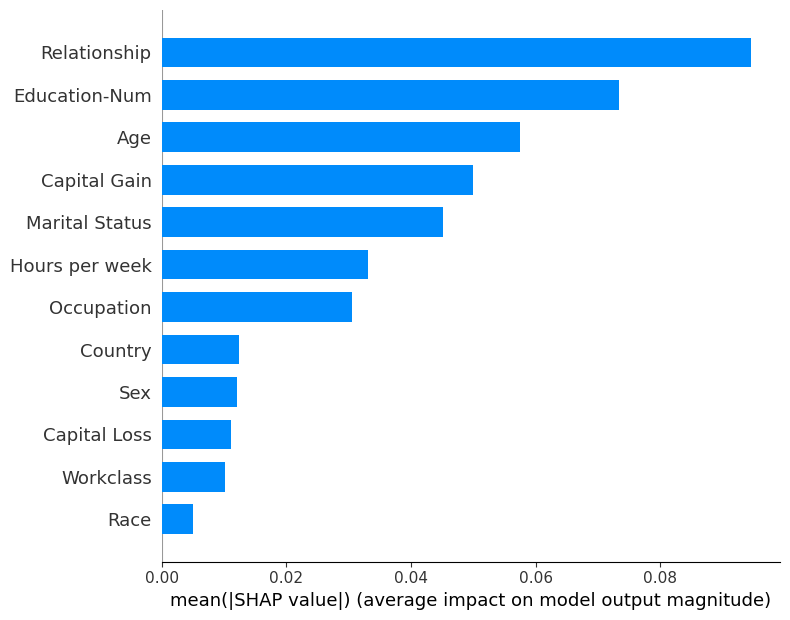

In [9]:
#変数重要度のサマリ
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


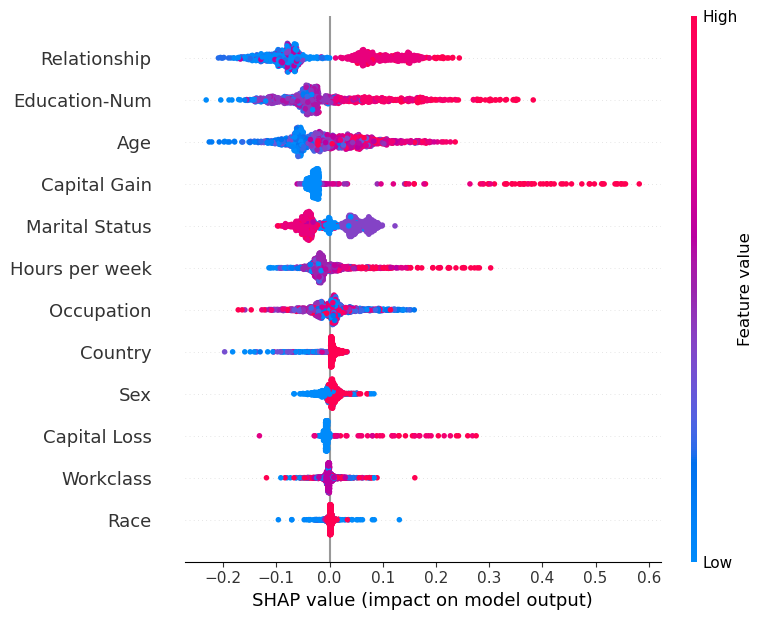

In [10]:
#各変数が高年収に、正負どちらに寄与しているかをプロット
shap.summary_plot(shap_values[1], X_train)

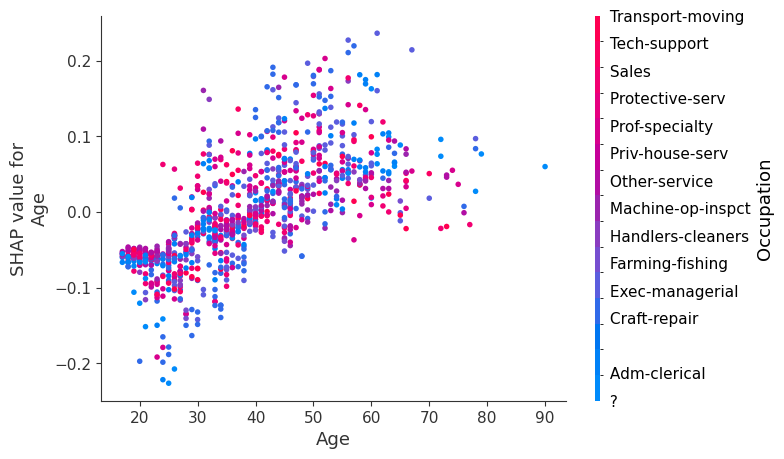

In [11]:
# 連続値の変数と予測値の関係(Ageを例に)
shap.dependence_plot("Age", shap_values[1], X_train,display_features=X_train_raw)


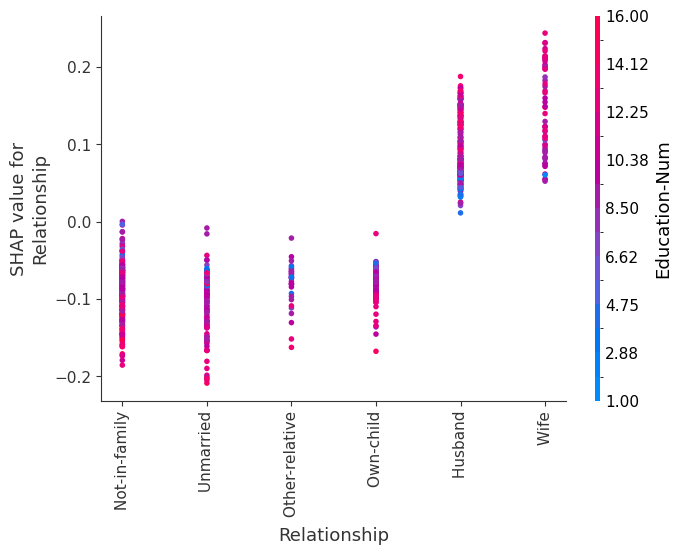

In [12]:
# カテゴリ変数と予測値の関係(Relationshipを例に)
shap.dependence_plot("Relationship", shap_values[1], X_train,display_features=X_train_raw)

In [13]:
#予測結果に対する各変数の寄与状況をプロット
shap.force_plot(explainer.expected_value[1], shap_values[1][0:500,:], X_train_raw.iloc[0:500,:],link="logit")
